# Team 14

In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# Define constants


In [28]:
IMAGE_SIZE = (28, 28)
BATCH_SIZE = 64
NUM_CLASSES = 10
EPOCHS = 30
TRAINING_SET_PATH = '/data/data/trainingSet'


# Load images using ImageDataGenerator


In [29]:

train_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    TRAINING_SET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    TRAINING_SET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 33604 images belonging to 10 classes.
Found 8396 images belonging to 10 classes.


# Define the CNN model


In [30]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(*IMAGE_SIZE, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])


# Compile the model


In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model


In [32]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS
)


Epoch 1/30
525/525 [==============================] - 46s 86ms/step - loss: 0.3037 - accuracy: 0.9062 - val_loss: 0.0718 - val_accuracy: 0.9781
Epoch 2/30
525/525 [==============================] - 34s 65ms/step - loss: 0.1028 - accuracy: 0.9702 - val_loss: 0.0478 - val_accuracy: 0.9841
Epoch 3/30
525/525 [==============================] - 35s 67ms/step - loss: 0.0723 - accuracy: 0.9777 - val_loss: 0.0415 - val_accuracy: 0.9870
Epoch 4/30
525/525 [==============================] - 35s 67ms/step - loss: 0.0572 - accuracy: 0.9832 - val_loss: 0.0413 - val_accuracy: 0.9870
Epoch 5/30
525/525 [==============================] - 35s 66ms/step - loss: 0.0481 - accuracy: 0.9846 - val_loss: 0.0389 - val_accuracy: 0.9884
Epoch 6/30
525/525 [==============================] - 33s 63ms/step - loss: 0.0417 - accuracy: 0.9869 - val_loss: 0.0332 - val_accuracy: 0.9903
Epoch 7/30
525/525 [==============================] - 35s 67ms/step - loss: 0.0366 - accuracy: 0.9877 - val_loss: 0.0362 - val_accuracy:

# Save the model


In [33]:
model.save('digit_classifier.h5')


# Plot the training/validation accuracy and loss


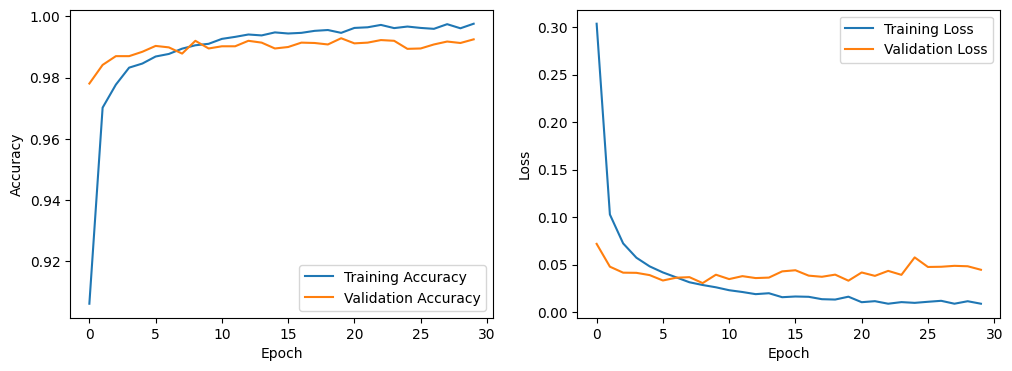

In [34]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Install Tensor.js so that we can convert the h5 file to something that can be used in javascript


In [36]:
!pip install tensorflowjs
!tensorflowjs_converter --input_format keras /content/digit_classifier.h5 /content//digit_classifier_tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-04-13 01:33:08.356192: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-04-13 01:33:08.356300: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-04-13 01:33:08.356321: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
